# Data Visualisation : Comparisons with Bar Charts

## Objectives

* Identify the importance of bar graphs for data comparison and story telling.
* Create simple bar graphs comparing classes within a vriable.
* Create multiple column bar graphs for comparing multiple dimensions in data.
* Create Stacked bar plots to visualize sub segments of a total quantity.

## Introduction and Background

Comparing multiple data elements is commonly achieved by using rectangles (bars) to represent the quantity for each element. For data scientists, bar charts are considered a great tool for data summarization and story telling techniques. [Here is an excellent article](http://www.storytellingwithdata.com/blog/2018/3/9/bring-on-the-bar-charts) for a motivational insight into how data scientists use bar graphs to tell interesting stories with their analyses and experiments. 

### Bar Graph or Column Graph.

Bar charts are one of the most common plot types for showing comparisons between data elements. A bar chart or column graph allows comparisons across categories by presenting categorical data as rectangular bars with heights or lengths proportional to the values that they represent. One axis of the chart shows the specific categories being compared and the other axis represents a discrete value scale. The bars can be plotted vertically or horizontally.  

![](bar2.png)

Bars Charts are distinguished from Histograms, as they do not display continuous developments over an interval. Bar Chart's discrete data is categorical data and therefore answers the question of "how many?" in each category.

![](bars1.svg)

A shortcoming of Bar Charts is that labelling may become too congested when there are a large number of bars.

Matplotlib comes packaged with a number of handy plotting functions. Matplotlib's `.bar()` and `.barh()` methods can be used to draw constant width vertical and constant height horizontal bar graphs for a simple sequence of x, y values. Lets first import necessary libraries and generate some sample data for our x and y axes. 

In [2]:
# import the required libraries
import numpy as np
import matplotlib.pyplot as plt

### Plot customization  

We can customize the general style of plots in terms of colors, contrast, backgrounds etc. 
. There are a number of pre-defined styles provided by matplotlib. `plt.style.use()` method can be use to import these pre-defined styles. Too check the list of all available styles, we can call `plt.style.available` property as shown below:

In [4]:
plt.style.available

['seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-ticks',
 'fivethirtyeight',
 'seaborn-whitegrid',
 'classic',
 '_classic_test',
 'fast',
 'seaborn-talk',
 'seaborn-dark-palette',
 'seaborn-bright',
 'seaborn-pastel',
 'grayscale',
 'seaborn-notebook',
 'ggplot',
 'seaborn-colorblind',
 'seaborn-muted',
 'seaborn',
 'Solarize_Light2',
 'seaborn-paper',
 'bmh',
 'seaborn-white',
 'dark_background',
 'seaborn-poster',
 'seaborn-deep']

For our labs and lessons, we shall use the pre-defined style called `“ggplot”`, which emulates the ggplot (a popular plotting package for R). You are encouraged to try different styles for yourself. To use a style, just add it with `.use()` method as below:

In [5]:
plt.style.use('ggplot')

Now we shall generated some random data for x axis as categories to compare and y axis for quantity we want to show for each category. 

In [7]:
# Set seed for reproducability
np.random.seed(100)

# Generate variable x with with 10 categories using numpy's arange function for x-axis
x = np.arange(10)

# For y-axis, generate 10 random quantities from the “standard normal” distribution (zero mean) 
# using numpy's random.randn() function
y = np.random.randn(10)

# Inspect the values of x and y
print(x)
print(y)

[0 1 2 3 4 5 6 7 8 9]
[-1.74976547  0.3426804   1.1530358  -0.25243604  0.98132079  0.51421884
  0.22117967 -1.07004333 -0.18949583  0.25500144]


Great. So now we have 10 values for our x axis and (fixed width - categories) and 10 values for the y axis (variable height - quantities). Let's plot these values as a bar chart using matplotlib's `.bar()` function. 

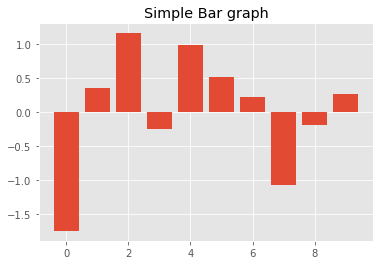

In [5]:
# Create a new figure object
fig = plt.figure()

# Create an axes 
ax = fig.add_subplot(111)

# Plot vertical bars of fixed width by passing x and y values to .bar() function 
ax.bar(x, y)

# Give a title to the bar graph
plt.title('Simple Bar graph')

# Output the final plot
plt.show()

So this is pretty straight-forward. We can easily plot any categorical data using this approach. We can further customize the plot above by changing colors and adding more objects to the plot like custom lines. Also, in some cases i.e. too many categories, it may be beneficial to use horizontal bar graphs instead of vertical ones. Let's see how we can customize and change orientation of above bar graph. 

Here, we shall try a slightly different programming approach to address multiple axes. `.plt.subplot()` method returns *axes* as numpy object and *figure* as a matplotlib object. We can use numpy array addressing method to access different axes as shown below: 

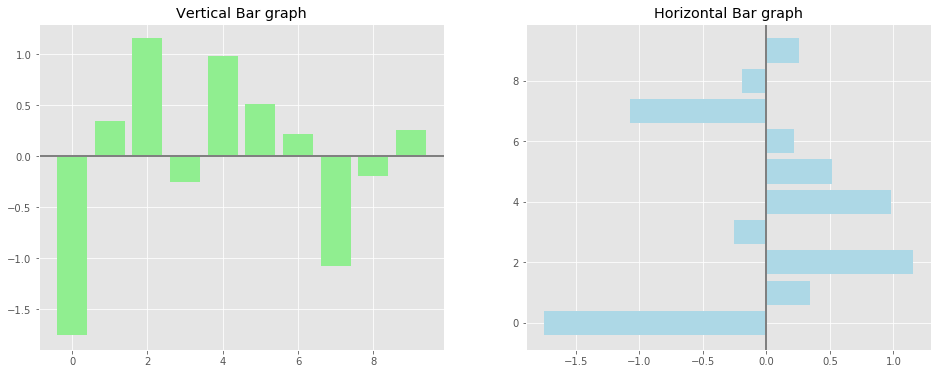

In [8]:
# Create a figure with two columns 
fig, axes = plt.subplots(ncols=2, figsize=(16,6))

# Use first and second axes to plot a vertical and horizontal bar graphs with x and y. 
# Use align argument for plot alignment within the axes
# Use color argument to specify the colors of the bars
vert_bars = axes[0].bar(x, y, color='lightgreen', align='center')
horiz_bars = axes[1].barh(x, y, color='lightblue', align='center')

# Use axhline & axvline to draw a line all the way across the axes at 0 position.
# This is a quick-n-easy way to draw an axis "spine".
axes[0].axhline(0, color='gray', linewidth=2)
axes[1].axvline(0, color='gray', linewidth=2)

# Set titles for both axes
axes[0].set_title("Vertical Bar graph")
axes[1].set_title("Horizontal Bar graph")

# Show the final plot
plt.show()


In the above plots, the orientation really doesnt make much difference , but for data with a large number of categories, a horizontal bar graph we prove visually more appealing. 

### Customizing Bar Charts

Matplotlib plotting methods return an **Artist** or a **sequence of artists**. Anything you can see in a Matplotlib figure/axes/etc is an Artist of some sort. Most of the time, you will not need to retain these returned objects. You will want to capture them for special customizing that may not be possible through the normal plotting mechanism. Further details on Artists are available at [official documentation](https://matplotlib.org/users/artists.html).

Let's modify our code for some conditional coloring of the bars. In the case of `.bar()`, a container artist is returned, so we'll modify its contents individually,  instead of the  whole container as we did earlier. We will also use `.text` method to add the values shown by each bar. 

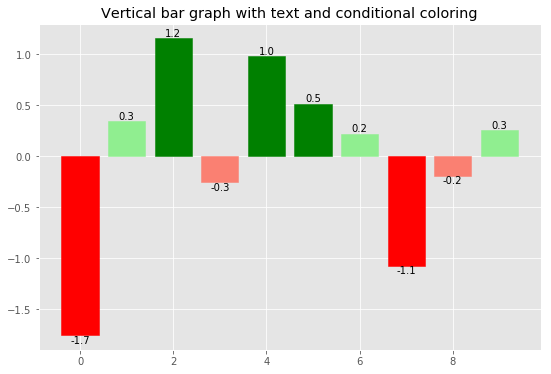

In [9]:
# Create a single figure and axes object
fig, ax = plt.subplots(figsize=(9,6))

# Call the .bar method and save the artist object as bars 
bars = ax.bar(x, y, align='center')

# Apply different colors to bars on +ve and -ve y values
for bar, val in zip(bars, y):
    if val < -0.5:
        bar.set(color='red')
    elif val < 0 and val >= -0.5:
        bar.set(color='salmon')
    elif val > 0 and val <= 0.5:
        bar.set(color='lightgreen')
    else:
        bar.set(color='green')
    
# Show text with bars using .text() method and conditionally put the y value above (+ve values) or below (-ve values) bars   
for pos, val in zip(x, y):
    plt.text(pos, val, str(round(val,1)), horizontalalignment='center',verticalalignment=('bottom' if val > 0 else 'top')) 

        
#Set title and show the plot
ax.set_title('Vertical bar graph with text and conditional coloring')
plt.show()

Here we can see that our bar graph has become much easier to read and conditional coloring with different contrast values gives an overall summary of the data. 

## Multiple Group Bar Charts

The bar charts we have created so far only show classes (or categories) from a single group. In some cases, we may want to compare data from groups having same categories i.e.  having multiple x-axes against same y axis . Let's try to think of an example where scores achieved in multiple activities by both male and female groups are to be visualized. 

In matplotlib, including multiple X values on the same plot can be achieved by reducing the width of the bars and then place the indices one bar’s width further from the y axis.  We shall also see how we can use `xticks` or `yticks` to further customize the labels on an axis in matplotlib. Lets see this in action below with a toy example:

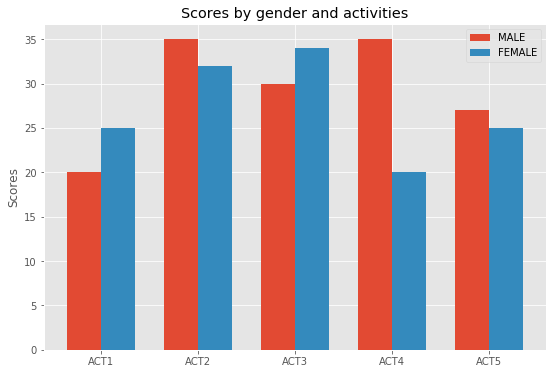

In [10]:
# Define number of categories
cat = 5

# Set quantities for two groups 
men_score = (20, 35, 30, 35, 27)
women_score = (25, 32, 34, 20, 25)

# Create a single figure and axes object
fig, ax = plt.subplots(figsize=(9,6))

# Set index for the number of categories
idx = np.arange(cat) 

# Set the width of the bars
width = 0.35       

# Plot the first group 
ax.bar(idx, men_score, width, label='MALE')

# Plot the second group at a length of 1 bar
ax.bar(idx + width, women_score, width, label='FEMALE')

# label the axes
ax.set_ylabel('Scores')
ax.set_title('Scores by gender and activities')

# Show different activities names on x axes
plt.xticks(idx + width / 2, ('ACT1', 'ACT2', 'ACT3', 'ACT4', 'ACT5'))
plt.legend(loc='best')
plt.show()

### Stacked Bar charts - Comparison with Composition

A stacked bar is a variation of the bar chart and is good for comparing sub-segments of results or for seeing which subtotal contributes the most to an overall sum. A standard bar chart compares individual data points with each other as seen in above examples. In a stacked bar chart, parts of the data are adjacent or stacked i.e. each bar displays a total amount, broken down into sub-amounts. Same subsections are of the same color in each bar allowing comparisons as the whole picture as well as the components of each bar.

Let's look at another toy example where we want to compare the performance of different countries in olympics, both as overall performance as comparisons of performances in categories gold, silver and bronze. 

In matplotlib, stacked bar charts require a parameter `bottom`, this informs matplotlib where the bar should start from, so we will add up the values below. Let's see this in action: 

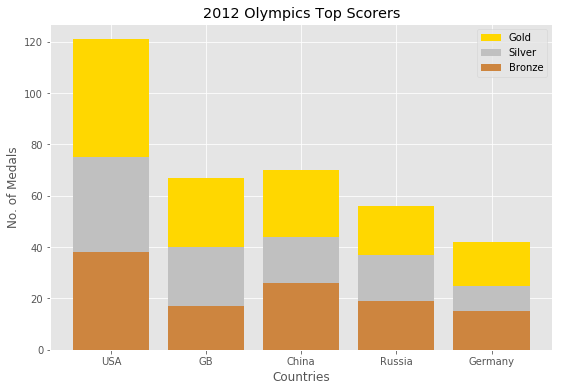

In [12]:
# Set the labels for countries and number of gold, silver and bronze awards
countries = ['USA', 'GB', 'China', 'Russia', 'Germany']
bronzes = np.array([38, 17, 26, 19, 15])
silvers = np.array([37, 23, 18, 18, 10])
golds = np.array([46, 27, 26, 19, 17])

# Set the index for number of classes
ind = np.arange(len(countries))

## Create a single figure and axes object
fig, ax = plt.subplots(figsize=(9,6))

#Create the rectangles while using bottom argument 
ax.bar(ind, golds, width=0.8, label='Gold', color='gold', bottom=silvers+bronzes)
ax.bar(ind, silvers, width=0.8, label='Silver', color='silver', bottom=bronzes)
ax.bar(ind, bronzes, width=0.8, label='Bronze', color='#CD853F')

# Set the labels and titles

ax.set_ylabel("No. of Medals")
ax.set_xlabel("Countries")
plt.legend(loc="upper right")
plt.title("2012 Olympics Top Scorers")
plt.xticks(ind, countries)

plt.show()

## Summary

In this lesson, we had a detailed look into how bar charts can be used to show comparisons between quantities of data elements. We used matplotlib to draw basic bar charts and worked our way towards creating a stacked bar plot towards the end. This insight will surely provide you with a handy tool for story telling and summarization of data. 

(Note: Do visit the link provided in the introduction, some of the charts there are truly amazing)